In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt

In [2]:
def load_data():
    N = 200
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7,
                                                  n_samples=N, n_features=2,
                                                  n_classes=2, shuffle=True,
                                                  random_state=None)
    return gq

In [3]:
gq = load_data()
gq

(array([[-4.90002826e-01,  5.18412183e-01],
        [-2.09611855e-01,  8.49897851e-01],
        [-6.98524523e-01,  1.07238469e+00],
        [ 2.90691167e-01, -4.66937379e-01],
        [-2.33837803e-01, -2.11803878e+00],
        [ 1.86345652e+00, -3.44946234e-01],
        [ 3.62039671e-02,  5.78287329e-01],
        [ 8.43269202e-03, -1.78162132e-01],
        [ 8.42433477e-02, -5.31478891e-02],
        [-2.79272768e-01, -4.86957844e-01],
        [-5.11074916e-01, -6.86008195e-01],
        [ 4.55761468e-01,  9.08771741e-01],
        [-1.18752692e+00, -4.26291840e-01],
        [ 1.38613855e+00,  8.88333834e-01],
        [ 1.46075870e-01,  2.33082654e-01],
        [ 4.82796847e-01, -7.95374535e-01],
        [-2.26049729e+00,  8.42640220e-02],
        [ 9.98800753e-02,  2.98586576e-02],
        [ 1.11535971e+00, -5.37485577e-01],
        [ 4.97990927e-01, -4.49816701e-01],
        [-4.58861651e-01, -8.97359427e-03],
        [-4.60477985e-01, -3.91878631e-01],
        [-6.71964558e-01,  1.784

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

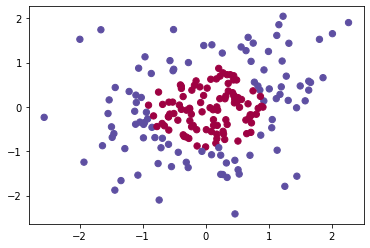

In [5]:
gaussian_quantiles = load_data()
X, Y = gaussian_quantiles


# Input Data
plt.figure("Input Data")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)

In [6]:
def show_predictions(model, X, Y, name=""):
    """ display the labeled data X and a surface of prediction of model """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_temp = np.c_[xx.flatten(), yy.flatten()]
    Z = model.predict(X_temp)
    plt.figure("Predictions " + name)
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1],c=Y, s=40, cmap=plt.cm.Spectral)

Logistic Regression accuracy :  0.52


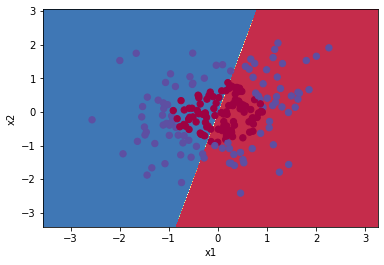

In [7]:
# Logisitc Regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y)

show_predictions(clf, X, Y, "Logistic regression")
    
LR_predictions = clf.predict(X)
print("Logistic Regression accuracy : ", np.sum(LR_predictions == Y) / Y.shape[0])

Loss  0  =  0.693150726437822
Loss  1000  =  0.07477094860012096
Loss  2000  =  0.05133917618513774
Loss  3000  =  0.04260541041794446
Loss  4000  =  0.03819320824888251
Neural Network accuracy :  0.99


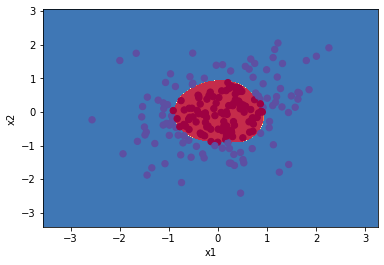

In [8]:
## Neural Network
class Neural_Network:
    def __init__(self, n_in, n_hidden, n_out):
        # Network dimensions
        self.n_x = n_in
        self.n_h = n_hidden
        self.n_y = n_out
        
        # Parameters initialization
        self.W1 = np.random.randn(self.n_h, self.n_x) * 0.01
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = np.random.randn(self.n_y, self.n_h) * 0.01
        self.b2 = np.zeros((self.n_y, 1))

    def forward(self, X):
        """ Forward computation """
        self.Z1 = self.W1.dot(X.T) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = sigmoid(self.Z2)
    
    def back_prop(self,  X, Y):
        """ Back-progagate gradient of the loss """
        m = X.shape[0]
        self.dZ2 = self.A2 - Y
        self.dW2 = (1 / m) * np.dot(self.dZ2, self.A1.T)
        self.db2 = (1 / m) * np.sum(self.dZ2, axis=1, keepdims=True)
        self.dZ1 = np.multiply(np.dot(self.W2.T, self.dZ2), 1 - np.power(self.A1, 2))
        self.dW1 = (1 / m) * np.dot(self.dZ1, X)
        self.db1 = (1 / m) * np.sum(self.dZ1, axis=1, keepdims=True)

    def train(self, X, Y, epochs, learning_rate=1.2):
        """ Complete process of learning, alternates forward pass,
            backward pass and parameters update """
        m = X.shape[0]
        for e in range(epochs):
            self.forward(X)
            loss = -np.sum(np.multiply(np.log(self.A2), Y) + np.multiply(np.log(1-self.A2),  (1 - Y))) / m
            self.back_prop(X, Y)

            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2

            if e % 1000 == 0:
                print("Loss ",  e, " = ", loss)

    def predict(self, X):
        """ Compute predictions with just a forward pass """
        self.forward(X)
        return np.round(self.A2).astype(np.int)


nn = Neural_Network(2, 10, 1)
nn.train(X, Y, 5000, 1.2)

show_predictions(nn, X, Y, "Neural Network")

nn_predictions = nn.predict(X)
print("Neural Network accuracy : ", np.sum(nn_predictions == Y) / Y.shape[0])